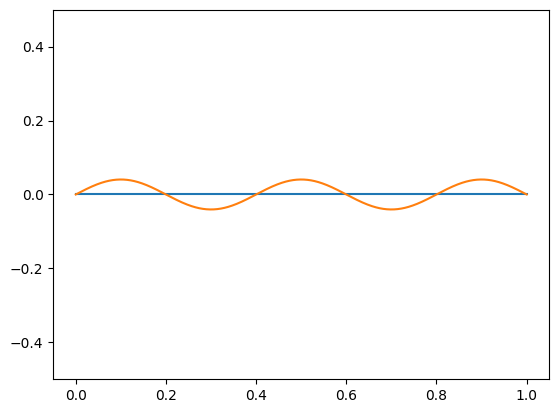

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

max_it = 10**4
n = 10**3
h = 1/n
alpha = 1
eps = 0.001

def jacob(n, u, h, alpha):
  J = [0]*(n-1)
  for i in range(n-1):
    J[i]=[0]*(n-1)
  for i in range(1, n):
    if i==1:
      J[i-1][i-1] = (3*alpha*u[i]**2+alpha+(2/h**2))*h**2
      J[i-1][i] = -1
    if i==n-2:
      J[i][i] = (3*alpha*u[i]**2+alpha+(2/h**2))*h**2
      J[i][i-1] = -1
    elif(i!=0 and i!=n-1):
      J[i][i] = (3*alpha*u[i]**2+alpha+(2/h**2))*h**2
      J[i][i-1] = -1
      J[i][i+1] = -1
  return J

def F(u, f, a):
  F = [0]*(n-1)
  for i in range(1, n):
    F[i-1] = -(-(u[i+1]-2*u[i]+u[i-1])+a*h**2*(u[i]**3+u[i])-h**2*f[i])
  return F

def Solve_SAE(u_0, a, f):
  u_1 = u_0
  u_2 = [0]*(n+1)
  du = [0]*(n+1)
  for i in range(max_it):
    du_mid = np.linalg.solve(jacob(n, u_1, h, a), F(u_1, f, a))
    for i in range(1, n):
      du[i] = du_mid[i-1]
    #print(du)
    for i in range(n+1):
      u_2[i] = u_1[i] + du[i]
    if np.linalg.norm(du)<eps:
      break
    for i in range(n+1):
      u_1[i] = u_2[i]
    #print("\n")
  return u_2

u = [0]*(n+1)
u[0]=0
u[n]=0

x = [0]*(n+1)
for i in range(n+1):
  x[i] = i*h

f1 = [0]*(n+1) #массив значений функции правой части
for i in range(n+1):
  f1[i] = 10*np.sin(5*np.pi*x[i])
f2 = [0]*(n+1) #массив значений функции правой части
for i in range(n+1):
  f2[i] = 10*((x[i]**2-x[i])**3+(x[i]**2-x[i])-2)
plt.plot(x, [0]*(n+1))
plt.plot(x, Solve_SAE(u, 0, f1))
#plt.plot(x, Solve_SAE(u, 1, f2))
#for i in range(5):
  #plt.plot(x, Solve_SAE(u, 0.5*i, f1))

plt.ylim (-1, 1)
plt.show()
